In [1]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier

In [47]:
#pip install keras
#!pip install tensorflow
#!pip install scikit-learn
#!pip install --upgrade tensorflow
#!pip install seaborn
#!pip install sklearn-pandas==1.5.0
#conda install -c conda-forge imbalanced-learn

# DATA SCIENCE - METODOLOGIA CRISP-DM

## CARGAMOS LOS DATOS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from pandas_profiling import ProfileReport

### Analizando DataFrame

In [3]:
df = pd.read_csv('fraudTrain.csv', encoding='latin-1')
df.head(7)

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   
5           5   2019-01-01 00:04:08  4767265376804500   
6           6   2019-01-01 00:04:42    30074693890476   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   

       last gender                        street  ...      lat      long  \
0     Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1      Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2   Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3     White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4    Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   
5    Conner      F             4655 David Island  ...  40.3750  -75.2045   
6  Richards      F   889 Sarah Station Suite 624  ...  37.9931 -100.9893   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   
5      2158                  Transport planner  1961-06-19   
6      2691                    Arboriculturist  1993-08-16   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0  
6         0  

[7 rows x 23 columns]

##### Filtrar Datos

In [3]:
df.loc[(df["gender"] == 'M') & (df["category"] == 'gas_transport'), ["first","gender","lat"]]

first gender      lat
3         Jeremy      M  46.2306
7         Steven      M  38.8432
21       Jeffrey      M  40.6866
46        Carlos      M  34.4959
52         James      M  45.7549
...          ...    ...      ...
1296610  Michael      M  38.2674
1296617   Samuel      M  38.4921
1296632   Martin      M  39.6967
1296635    James      M  31.6453
1296637    Jared      M  35.8184

[58992 rows x 3 columns]

##### Agrupaciones (analizar una variable numerica dentro de otra variable categorica) e interpretacion de datos

In [37]:
df.groupby('category')['lat'].mean()

category
entertainment     38.585850
food_dining       38.496604
gas_transport     38.801436
grocery_net       38.203587
grocery_pos       38.529579
health_fitness    38.628414
home              38.498473
kids_pets         38.518723
misc_net          38.622271
misc_pos          38.473879
personal_care     38.491020
shopping_net      38.515988
shopping_pos      38.387147
travel            38.622436
Name: lat, dtype: float64

In [41]:
# Utilizar Subgrupos, apartir de un grupo, y de ello sacar una operacion
df.groupby(['gender','category'])['lat'].mean()

gender  category      
F       entertainment     38.316877
        food_dining       38.251340
        gas_transport     38.866492
        grocery_net       38.003315
        grocery_pos       38.263226
        health_fitness    38.431132
        home              38.233780
        kids_pets         38.299994
        misc_net          38.520240
        misc_pos          38.252253
        personal_care     38.294415
        shopping_net      38.274876
        shopping_pos      38.163586
        travel            38.390478
M       entertainment     38.868699
        food_dining       38.772144
        gas_transport     38.721300
        grocery_net       38.454439
        grocery_pos       38.828805
        health_fitness    38.848072
        home              38.797229
        kids_pets         38.792918
        misc_net          38.753793
        misc_pos          38.725833
        personal_care     38.796610
        shopping_net      38.832087
        shopping_pos      38.697630
     

In [39]:
#Ordenar los resultados: ascending = False, ordena los datos de mayor a menor
df.groupby('category')['lat'].mean().sort_values(ascending = False)

category
gas_transport     38.801436
health_fitness    38.628414
travel            38.622436
misc_net          38.622271
entertainment     38.585850
grocery_pos       38.529579
kids_pets         38.518723
shopping_net      38.515988
home              38.498473
food_dining       38.496604
personal_care     38.491020
misc_pos          38.473879
shopping_pos      38.387147
grocery_net       38.203587
Name: lat, dtype: float64

## 1. ANALISIS EXPLORATORIO DE LOS DATOS

### 1.1 Status del conjunto de datos

#### 1.1.1 Estadistica descriptiva de los datos.

In [4]:
# Estadistica descriptiva de los datos.
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

#### 1.1.2 Deteccion de valores Nulos(NAN)

In [3]:
# Deteccion de valores Nulos(NAN)
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### 1.1.3 Reporte PandasProfiling

In [5]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:02<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:04<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile.to_file(output_file='EDA_Deteccion_Fraude_Tarjetas.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.2 Definir Tipo de datos 

In [4]:
# Objetc = String(Categoricos), int64 = int(Discretos), float64 = float(Continuos)
# Discreto (Valores enteros) y Continuos(Cualquier valor en un rango, con decimales)
# Nominales (Etiqueta datos) , Binarios (2 opciones), Ordinales (Orden de datos: Bajo,Medio,Alto)
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [5]:
df['cc_num'].dtype

dtype('int64')

### 1.3 Descripcion estadistica de los Datos (Analisis univariado, bivariado, multivariado)

##### 1.3.1 Variables Numericas

##### 1..3.1.1 Medidas de Tendencia Central

##### Maximo valor de mis datos

In [4]:
df.loc[(df["gender"] == 'M') & (df["category"] == 'gas_transport'), ["first","gender","lat"]].max()

first     Zachary
gender          M
lat       66.6933
dtype: object

##### Media(Promedio) de los Datos (Sensible a Outliers)

In [14]:
df['lat'].mean()
#df.loc[(df['lat'] == var) , ["first","gender","lat"]]
#index=df['lat'].idxmax
#df.iloc[index]

38.53762161489965

#### Mediana de los datos (Robusto frente a Outliers)

In [ ]:
#La mediana corrresponde al dato, tal que, el 50% de las observaciones son menores o iguales a este, y
#el 50% son mayores a este.

In [32]:
df[['amt']].median()

amt    47.52
dtype: float64

##### 1.3.1.2 Medidas de Variabilidad (Dispersion)

##### Cuantiles(Puntos en el rango 0-100) | Cuartiles 

In [20]:
df[['amt','lat']].quantile([0.25, 0.5, 0.75])

amt      lat
0.25   9.65  34.6205
0.50  47.52  39.3543
0.75  83.14  41.9404

##### Desviacion Estandar (Sensible a Outliers)

In [31]:
# A mayor desviacion, mayor dispersion (mas amplio el rango de valores concentrados) respecto a la media
df[['amt','lat']].std()

amt    160.316039
lat      5.075808
dtype: float64

##### Rango Intercuartil RIC:(Q75-Q25) (Robusto a Outliers)

In [36]:
# A mayor RIC, mayor dispersion(mas amplio el rango de valores concentrados)
df[['amt','lat']].quantile(0.75) - df[['amt','lat']].quantile(0.25)

amt    73.4900
lat     7.3199
dtype: float64

##### 1.3.2 Variables categoricas

##### Distribucion de Frecuencias y Tablas Cruzadas

In [24]:
df.loc[df['is_fraud'] == 1, 'gender'].value_counts()

M    3771
F    3735
Name: gender, dtype: int64

In [25]:
df.loc[df['is_fraud'] == 1, 'gender'].value_counts(normalize = True) * 100

M    50.239808
F    49.760192
Name: gender, dtype: float64

##### Tabla cruzada

In [26]:
pd.crosstab(df["gender"], df["is_fraud"], margins = 1)

is_fraud        0     1      All
gender                          
F          706128  3735   709863
M          583041  3771   586812
All       1289169  7506  1296675

### 1.4 Vizualizar los datos

#### 1.4.3 Datos Numericos

#####  Histogramas

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat'>

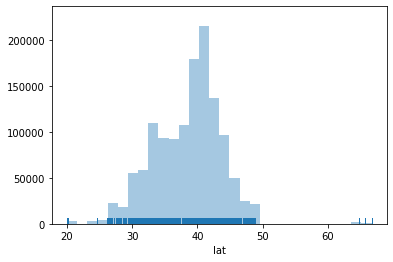

In [18]:
# Histogramas (kde : dibuja la linea entre las barras, rug: muestra concentracion encima de barras)
import seaborn as sns
sns.distplot(df['lat'], bins=30, kde=False, rug=True)

#####  Funcion de Densidad de probabilidad

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

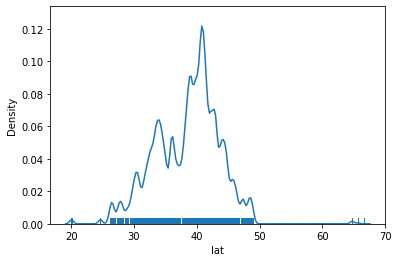

In [3]:
sns.distplot(df['lat'], hist=False, rug=True)

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


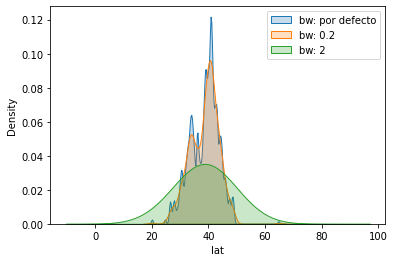

In [6]:
#Funcion de densidad usando KDEPLOT (bw : anco de banda , a mayor bw seria un Bin pequeño, y 
#abarca mas informacion en la curva
sns.kdeplot(df['lat'], label='bw: por defecto', shade=True)
sns.kdeplot(df['lat'], bw=0.2, label='bw: 0.2', shade=True)
sns.kdeplot(df['lat'], bw=2, label='bw: 2', shade=True)
plt.legend()

##### Funcion de Densidad (KDE) y Histograma juntos

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

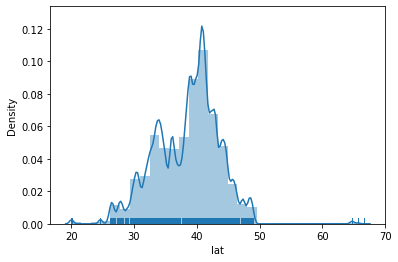

In [8]:
sns.distplot(df['lat'], bins=30, rug=True)

##### Grafica de probaibilidad Acumulada

<AxesSubplot:xlabel='lat', ylabel='Density'>

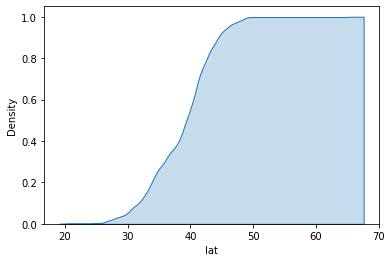

In [9]:
sns.kdeplot(df['lat'], cumulative=True, shade=True)

##### Curva de probabilidad acumulada de varios Meses

<function matplotlib.pyplot.legend(*args, **kwargs)>

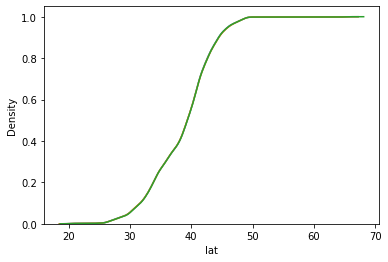

In [19]:
for x in df.query("Month in [1,2,3]")['Month'].unique().tolist():
    sns.kdeplot(df[df['Month'] == x]['lat'], cumulative=True, label=x)
plt.legend

##### Diagrama de cajas varibleNumerica  unitaria

<AxesSubplot:>

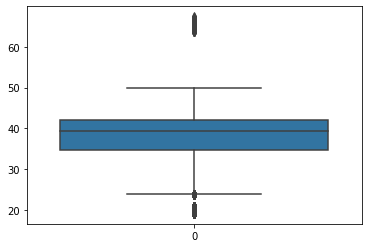

In [11]:
sns.boxplot(data=df['merch_lat'], showfliers=True)

#### 1.4.2 Datos Categoricos y Analisis Bivariado

##### Grafico de Barras para variables categoricas (frecuencia de una variable categorica)

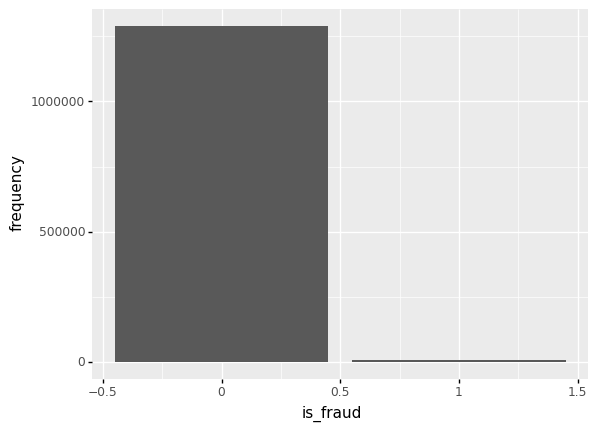

<ggplot: (-9223371906793470476)>

In [21]:
from plotnine import *

freq_by_species = (df 
  .groupby("is_fraud")
  .agg(frequency=("is_fraud", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "is_fraud", y = "frequency")) +
  geom_bar(stat = 'identity'))

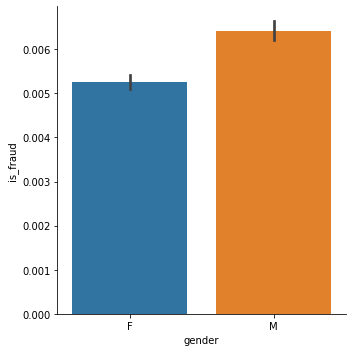

In [24]:
#Grafico de barras, para 2 variables categoricas
sns.catplot(x = "gender", y = "is_fraud", kind = "bar", data = df);

##### Graficas de Dispersion (2 Variables)

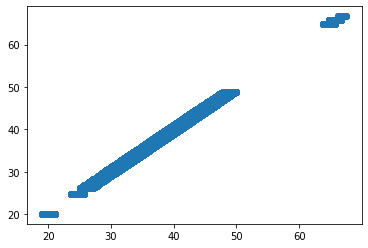

In [26]:
plt.scatter(df["merch_lat"], df["lat"])

<AxesSubplot:xlabel='amt', ylabel='lat'>

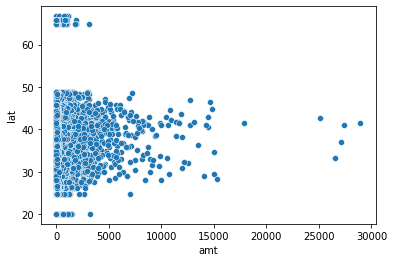

In [3]:
sns.scatterplot(data=df, x="amt", y="lat")
#sns.scatterplot(data=df, x="merch_lat", y="lat", hue="Year")

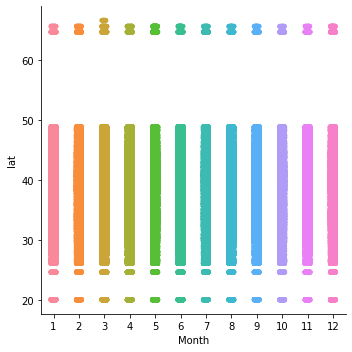

In [6]:
#Efecto Jitter: Muestra un mayor ancho en la grafica cuando concentra mayor data
#catplot: para variables categoricas
#No muy recomendable
sns.catplot(x="Month", y="lat", jitter=True, data=df)

##### Diagrama de Cajas para varibles Categoricas

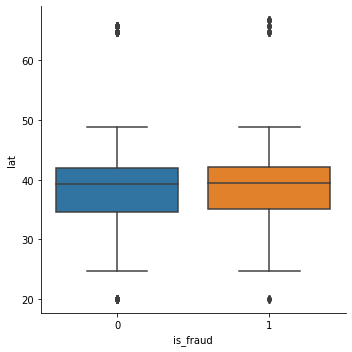

In [8]:
sns.catplot(x="is_fraud", y="lat", kind="box", data=df)

##### Diagrama de Violin Agrupados

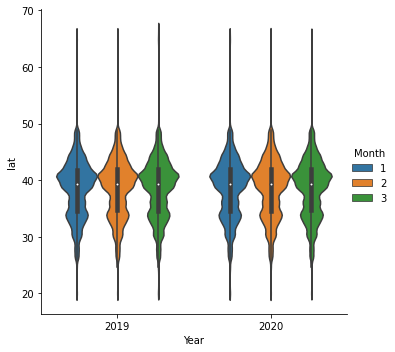

In [10]:
sns.catplot(x="Year", y="lat", hue="Month",  kind="violin", data=df.query("Month in [1,2,3] & Year in [2019,2020]"))

##### Grafico de barras Apiladas de 2 varibles categoricas

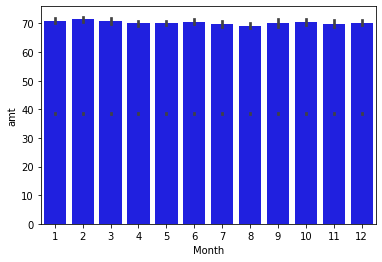

In [6]:
# Barras apiladas, para 3 variables en 2 lineas de codigo
s1 = sns.barplot(x = 'Month', y = 'lat', data = df, color = 'red')
s2 = sns.barplot(x = 'Month', y = 'amt', data = df, color = 'blue')

<AxesSubplot:xlabel='Month', ylabel='lat'>

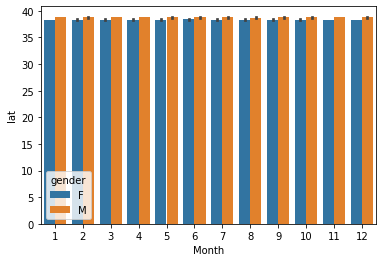

In [7]:
# Similar a apilar, pero pone las barras al costaoo
sns.barplot(x ="Month", y = 'lat', data = df, hue = "gender")

#### 1.4.4 Analisis Multivariado

##### Matriz de Correlacion

<AxesSubplot:>

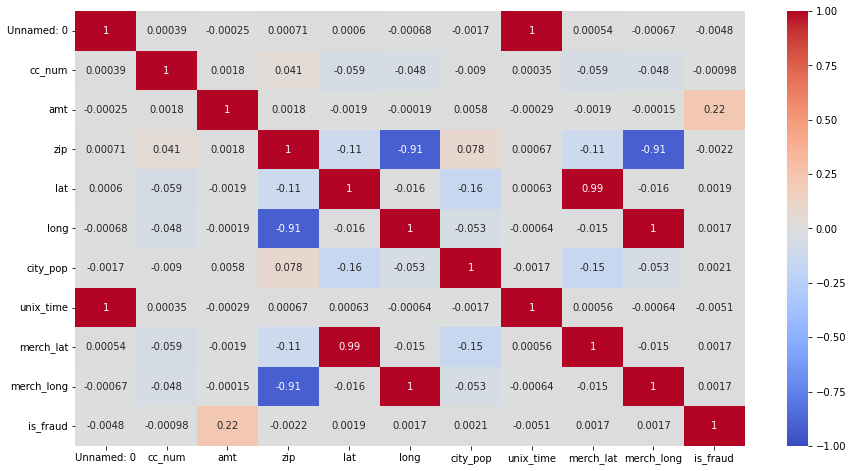

In [9]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

### 1.5 Summary Final de EDA

In [10]:
# La variable merch_long y zip, tienen una correlacion negativa fuerte,por ello una de ellas debe ser eliminada
# Variables independientes mas correlacionadas con variable Dependiente:
# amt
#Variables independientes mas correlacionadas
# long y zip, merch_long y zip, merch_lat y lat, merch_long y long
# Nos quedamos con : lat y long


## 2. PREPARACION DE DATOS

### 2.1 Ajuste de Formato de los Datos (CSV, JSON, XML)

##### 2.1.1 Formatear datos

In [10]:
#Formatear Fechas
def formatear_fecha(campo_fecha):
    column_fecha = pd.to_datetime(campo_fecha)
    change_column_fecha =  column_fecha.dt.strftime("%m/%d/%y")
    return change_column_fecha  
formatear_fecha(df["trans_date_trans_time"])

0          01/01/19
1          01/01/19
2          01/01/19
3          01/01/19
4          01/01/19
             ...   
1296670    06/21/20
1296671    06/21/20
1296672    06/21/20
1296673    06/21/20
1296674    06/21/20
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [4]:
df["trans_date_trans_time"]= pd.to_datetime(df["trans_date_trans_time"]) 
df['Year'] = df["trans_date_trans_time"].dt.year 
df['Month'] = df["trans_date_trans_time"].dt.month 
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

        city_pop                                job         dob  \
0           3495          Psychologist, counselling  1988-03-09   
1            149  Special educational needs teacher  1978-06-21   
2           4154        Nature conservation officer  1962-01-19   
3           1939                    Patent attorney  1967-01-12   
4             99     Dance movement psychotherapist  1986-03-28   
...          ...                                ...         ...   
1296670      258                       Geoscientist  1961-11-24   
1296671      100   Production assistant, television  1979-12-11   
1296672      899                    Naval architect  1967-08-30   
1296673     1126              Volunteer coordinator  1980-08-18   
1296674      218           Therapist, horticultural  1995-08-16   

                                trans_num   unix_time  merch_lat  merch_long  \
0        0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1        1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2        a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3        6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4        a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
...                                   ...         ...        ...         ...   
1296670  440b587732da4dc1a6395aba5fb41669  1371816728  36.841

#####  Formatear separador de cifras

In [5]:
# Formatear separador de cifras
column_amt = df['amt'].astype(str).str.replace('.', ',')
column_amt

C:\Users\Bryan\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


0            4,97
1          107,23
2          220,11
3            45,0
4           41,96
            ...  
1296670     15,56
1296671      51,7
1296672    105,93
1296673      74,9
1296674       4,3
Name: amt, Length: 1296675, dtype: object

### 2.2 Unificacion de los Datos

##### Integracion de datos (columnas adicionales)

In [10]:
df_nuevo_dataset = pd.DataFrame(np.random.randint(0,1000,size=(100, 4)), columns=list('ABCD'))
df_nuevo_dataset['lat'] = df['lat'].sample(n=100).tolist()
df_nuevo_dataset

A    B    C    D      lat
0   701  692  701  719  37.2692
1   749  616  108  340  39.5483
2   623  739   39  475  37.6848
3    78  839   69  958  36.7558
4   726  749  857  858  33.9315
..  ...  ...  ...  ...      ...
95  296  459  327  989  32.8357
96  537  106  880   53  40.8798
97  698  208   84  649  31.9290
98  891  286  324  947  33.9349
99  628  937  823  140  31.9290

[100 rows x 5 columns]

In [13]:
df_final = pd.merge(df, df_nuevo_dataset, on='lat', how='left')
df_final

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1305326     1296670   2020-06-21 12:12:08       30263540414123   
1305327     1296671   2020-06-21 12:12:19     6011149206456997   
1305328     1296672   2020-06-21 12:12:32     3514865930894695   
1305329     1296673   2020-06-21 12:13:36     2720012583106919   
1305330     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1305326                    fraud_Reichel Inc  entertainment   15.56   
1305327             fraud_Abernathy and Sons    food_dining   51.70   
1305328                 fraud_Stiedemann Ltd    food_dining  105.93   
1305329  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1305330  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1305326         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1305327      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1305328  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1305329       Joseph     Murray      M           42933 Ryan Underpass  ...   
1305330      Jeffrey      Smith      M           135 Joseph Mountains  ...   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                               ...         ...        ...   
1305326  1961-11-24  440b587732da4dc1a6395aba5fb41669  1371816728  36.841266   
1305327  1979-12-11  278000d2e0d2277d1de2f890067dcc0a  1371816739  38.906881   
1305328  1967-08-30  483f52fe67fabef353d552c1e662974c  1371816752  33.619513   
1305329  1980-08-18  d667cdcbadaaed3da3f4020e83591c83  1371816816  42.788940   
1305330  1995-08-16  8f7c8e4ab7f25875d753b422917c98c9  1371816817  46.565983   

         merch_long  is_fraud      A      B      C      D  
0        -82.048315         0    NaN    NaN    NaN    NaN  
1       -118.186462         0    NaN    NaN    NaN    NaN  
2       -112.154481         0    NaN    NaN    NaN    NaN  
3       -112.561071         0    NaN    NaN    NaN    NaN  
4        -78.632459         0  644.0  594.0  229.0  289.0  
...             ...       ...    ...    ...    ...    ...  
1305326 -111.690765         0    NaN    NaN  

### 2.3 Tratamiento de Datos Faltantes 

In [32]:
titanic = sns.load_dataset("titanic")
titanic.head(20)
#titanic.shape

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
5          0       3    male   NaN      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   
11         1       1  female  58.0      0      0  26.5500        S   First   
12         0       3    male  20.0      0      0   8.0500        S   Third   
13         0       3    male  39.0      1      5  31.2750        S   Third   
14         0       3  female  14.0      0      0   7.8542        S   Third   
15         1       2  female  55.0      0      0  16.0000        S  Second   
16         0       3    male   2.0      4      1  29.1250        Q   Third   
17         1       2    male   NaN      0      0  13.0000        S  Second   
18         0       3  female  31.0      1      0  18.0000        S   Third   
19         1       3  female   NaN      0      0   7.2250        C   Third   

      who  adult_male deck  embark_town alive  alone  
0     man        True  NaN  Southampton    no  False  
1   woman       False    C    Cherbourg   yes  False  
2   woman       False  NaN  Southampton   yes   True  
3   woman       False    C  Southampton   yes  False  
4     man        True  NaN  Southampton    no   True  
5     man        True  NaN   Queenstown    no   True  
6     man        True    E  Southampton    no   True  
7   child       False  NaN  Southampton    no  False  
8   woman       False  NaN  Southampton   yes  False  
9   child       False  NaN    Cherbourg   yes  False  
10  child       False    G  Southampton   yes  False  
11  woman       False    C  Southampton   yes   True  
12    man        True  NaN  Southampton    no   True  
13    man        True  NaN  Southampton    no  False  
14  child       False  NaN  Southampton    no   True  
15  woman       False  NaN  Southampton   yes   True  
16  child       False  NaN   Queenstown    no  False  
17    man        True  NaN  Southampton   yes   True  
18  woman       False  NaN  Southampton    no  False  
19  woman       False  NaN    Cherbourg   yes   True

In [28]:
# Deteccion de valores Nulos(NAN)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Eliminar filas NaN

In [14]:
# Eliminar la Fila, si todos sus valores son NuLL
titanic1 = titanic.dropna(axis=0, how="all")
#titanic1.shape

(891, 15)

In [16]:
# Eliminar la Fila, si alguno de sus valores es NuLL (Seria adecuado si el porcentaje de 
#datos eliminados es muy pequeño)
titanic2 = titanic.dropna(axis=0, how="any")
titanic2.shape

(182, 15)

#### Rellenar valores NAN

In [17]:
col = titanic["age"].fillna(titanic["age"].median())
col.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [19]:
titanic["new_age"] = col
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  new_age  
0    man        True  NaN  Southampton    no  False     22.0  
1  woman       False    C    Cherbourg   yes  False     38.0  
2  woman       False  NaN  Southampton   yes   True     26.0  
3  woman       False    C  Southampton   yes  False     35.0  
4    man        True  NaN  Southampton    no   True     35.0  
5    man        True  NaN   Queenstown    no   True     28.0  
6    man        True    E  Southampton    no   True     54.0  
7  child       False  NaN  Southampton    no  False      2.0  
8  woman       False  NaN  Southampton   yes  False     27.0  
9  child       False  NaN    Cherbourg   yes  False     14.0

In [20]:
titanic = titanic.drop(["age"], axis=1)
titanic.head(10)

survived  pclass     sex  sibsp  parch     fare embarked   class    who  \
0         0       3    male      1      0   7.2500        S   Third    man   
1         1       1  female      1      0  71.2833        C   First  woman   
2         1       3  female      0      0   7.9250        S   Third  woman   
3         1       1  female      1      0  53.1000        S   First  woman   
4         0       3    male      0      0   8.0500        S   Third    man   
5         0       3    male      0      0   8.4583        Q   Third    man   
6         0       1    male      0      0  51.8625        S   First    man   
7         0       3    male      3      1  21.0750        S   Third  child   
8         1       3  female      0      2  11.1333        S   Third  woman   
9         1       2  female      1      0  30.0708        C  Second  child   

   adult_male deck  embark_town alive  alone  new_age  
0        True  NaN  Southampton    no  False     22.0  
1       False    C    Cherbourg   yes  False     38.0  
2       False  NaN  Southampton   yes   True     26.0  
3       False    C  Southampton   yes  False     35.0  
4        True  NaN  Southampton    no   True     35.0  
5        True  NaN   Queenstown    no   True     28.0  
6        True    E  Southampton    no   True     54.0  
7       False  NaN  Southampton    no  False      2.0  
8       False  NaN  Southampton   yes  False     27.0  
9       False  NaN    Cherbourg   yes  False     14.0

##### Completar Datos Null de Datos Categoricos

In [31]:
#Completamos todos los campos Null, como el valor que es mas frecuente em cada Columna (Categoricas y Numericas)
colum2 = titanic.apply(lambda x: x.fillna(x.value_counts().index[0]))
colum2.head(20)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
5          0       3    male  24.0      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   
11         1       1  female  58.0      0      0  26.5500        S   First   
12         0       3    male  20.0      0      0   8.0500        S   Third   
13         0       3    male  39.0      1      5  31.2750        S   Third   
14         0       3  female  14.0      0      0   7.8542        S   Third   
15         1       2  female  55.0      0      0  16.0000        S  Second   
16         0       3    male   2.0      4      1  29.1250        Q   Third   
17         1       2    male  24.0      0      0  13.0000        S  Second   
18         0       3  female  31.0      1      0  18.0000        S   Third   
19         1       3  female  24.0      0      0   7.2250        C   Third   

      who  adult_male deck  embark_town alive  alone new_deck  
0     man        True    C  Southampton    no  False        C  
1   woman       False    C    Cherbourg   yes  False        C  
2   woman       False    C  Southampton   yes   True        C  
3   woman       False    C  Southampton   yes  False        C  
4     man        True    C  Southampton    no   True        C  
5     man        True    C   Queenstown    no   True        C  
6     man        True    E  Southampton    no   True        E  
7   child       False    C  Southampton    no  False        C  
8   woman       False    C  Southampton   yes  False        C  
9   child       False    C    Cherbourg   yes  False        C  
10  child       False    G  Southampton   yes  False        G  
11  woman       False    C  Southampton   yes   True        C  
12    man        True    C  Southampton    no   True        C  
13    man        True    C  Southampton    no  False        C  
14  child       False    C  Southampton    no   True        C  
15  woman       False    C  Southampton   yes   True        C  
16  child       False    C   Queenstown    no  False        C  
17    man        True    C  Southampton   yes   True        C  
18  woman       False    C  Southampton    no  False        C  
19  woman       False    C    Cherbourg   yes   True        C

##### using sklearn-pandas package para completar NULL de Variables Categoricos

In [46]:
#!pip install sklearn-pandas==1.5.0

In [45]:
## using sklearn-pandas package 
from sklearn_pandas import CategoricalImputer
 
# Completamos datos NULL de una columna categorica en especifico
imputer = CategoricalImputer()
colum3 = np.array(titanic['deck'], dtype=object)
colum3=imputer.fit_transform(colum3)
colum3=pd.DataFrame(colum3, columns=["new_deck"])
colum3.head(10)

new_deck
0        C
1        C
2        C
3        C
4        C
5        C
6        E
7        C
8        C
9        C

In [48]:
titanic["new_deck_"] = colum3
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone new_deck_  
0    man        True  NaN  Southampton    no  False         C  
1  woman       False    C    Cherbourg   yes  False         C  
2  woman       False  NaN  Southampton   yes   True         C  
3  woman       False    C  Southampton   yes  False         C  
4    man        True  NaN  Southampton    no   True         C  
5    man        True  NaN   Queenstown    no   True         C  
6    man        True    E  Southampton    no   True         E  
7  child       False  NaN  Southampton    no  False         C  
8  woman       False  NaN  Southampton   yes  False         C  
9  child       False  NaN    Cherbourg   yes  False         C

##### Eliminar Duplicados

In [56]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
887    False
888    False
889    False
890    False
Length: 784, dtype: bool

In [55]:
titanic=titanic.drop_duplicates()

### 2.4 Tratamiento de Valores Atipicos (Outliers)

#### 2.4.1 Metodo Rango Intercuartil ( Q3 - Q1)

In [22]:
#q1 = df["lat"].quantile(0.25)
#q3 = df["lat"].quantile(0.75)
q1, q2, q3 = df["lat"].quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
q1, q3, iqr


(34.6205, 41.9404, 7.319899999999997)

In [23]:
# Hallamos el Limite superior y inferior
limit_superior = q3 + (1.5 * iqr)
limit_inferior = q1 - (1.5 * iqr)
limit_inferior, limit_superior

(23.640650000000004, 52.920249999999996)

<AxesSubplot:>

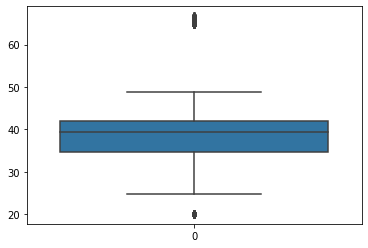

In [19]:
#Vemos que hay valores atipicos(outliers) con el diagrama de cajas
sns.boxplot(data=df['lat'])

In [16]:
#Vizualizamos los Outliers en el DataFrame
df.query("lat < @limit_inferior or lat > @limit_superior")
#df.loc[(df["lat"] > limit_superior) | (df["lat"] < limit_inferior)]

Unnamed: 0 trans_date_trans_time               cc_num  \
28               28   2019-01-01 00:22:06  4225990116481262579   
236             236   2019-01-01 02:56:56      341546199006537   
256             256   2019-01-01 03:12:57  4225990116481262579   
433             433   2019-01-01 05:44:16  4742883543039288059   
671             671   2019-01-01 08:45:43      341546199006537   
...             ...                   ...                  ...   
1296297     1296297   2020-06-21 08:50:46  4225990116481262579   
1296359     1296359   2020-06-21 09:22:08     3576144910346950   
1296363     1296363   2020-06-21 09:25:07     3576144910346950   
1296372     1296372   2020-06-21 09:28:43  4742883543039288059   
1296600     1296600   2020-06-21 11:36:01     3576144910346950   

                                   merchant       category     amt      first  \
28                          fraud_Kunze Inc    grocery_pos   90.22      Brian   
236                     fraud_Hills-Witting   shopping_net    8.70       Mark   
256        fraud_Cormier, Stracke and Thiel  entertainment    3.14      Brian   
433                    fraud_Heller-Langosh  gas_transport   62.62  Cassandra   
671                  fraud_Dickinson-Rempel       misc_pos  154.91       Mark   
...                                     ...            ...     ...        ...   
1296297   fraud_Boehm, Predovic and Reinger       misc_pos   30.60      Brian   
1296359                     fraud_Emard Inc  gas_transport   80.87     Thomas   
1296363                    fraud_Huels-Hahn  gas_transport   82.25     Thomas   
1296372  fraud_Swift, Bradtke and Marquardt    grocery_net   42.29  Cassandra   
1296600                  fraud_Predovic Inc   shopping_net    2.06     Thomas   

            last gender                        street  ...      lat      long  \
28       Simpson      M              2711 Duran Pines  ...  20.0827 -155.4880   
236        Brown      M               8580 Moore Cove  ...  64.7556 -165.6723   
256      Simpson      M              2711 Duran Pines  ...  20.0827 -155.4880   
433      Sanders      F        78117 George Mountains  ...  20.0271 -155.3697   
671        Brown      M               8580 Moore Cove  ...  64.7556 -165.6723   
...          ...    ...                           ...  ...      ...       ...   
1296297  Simpson      M              2711 Duran Pines  ...  20.0827 -155.4880   
1296359    Payne      M  9455 Kathleen Brook Apt. 651  ...  65.6899 -156.2920   
1296363    Payne      M  9455 Kathleen Brook Apt. 651  ...  65.6899 -156.2920   
1296372  Sanders      F        78117 George Mountains  ...  20.0271 -155.3697   
1296600    Payne      M  9455 Kathleen Brook Apt. 651  ...  65.6899 -156.2920   

         city_pop                           job         dob  \
28           4878               Physiotherapist  1966-12-03   
236           145      Administrator, education  1939-11-09   
256          4878               Physiotherapist  1966-12-03   
433          1490   Scientist, research (maths)  1991-04-13   
671           145      Administrator, education  1939-11-09   
...           ...                           ...         ...   
1296297      4878               Physiotherapist  1966-12-03   
1296359       277  Engineer, civil (consulting)  1965-11-06   
1296363       277  Engineer, civil (consulting)  1965-11-06   
1296372      1490   Scientist, research (maths)  1991-04-13   
1296600       277  Engineer, civil (consulting)  1965-11-06   

                                trans_num   unix_time  merch_lat  merch_long  \
28       95826e3caa9e0b905294c6dae985aec1  1325377326  19.560013 -156.045889   
236      f72573a40026254460e02d05ae72672a  1325386616  65.023497 -166.148374   
256      cb117fff5645082a2525119c1eafec53  1325387577  20.995398 -155.369362   
433      4e14f0bd0481beb88caa1dc4422ed8e6  1325396656  19.209212 -155.162140   
671      3d9aa6d05c4cf14c4af5d377e0ae4dc8  1325407543  65.336985 -165.345690   
...                              

##### Eliminar Datos Outliers

In [9]:
new_df = df.loc[(df["lat"] < limit_superior) & (df["lat"] > limit_inferior)]
print("old_data", len(df))
print("new_data", len(new_df))

old_data 1296675
new_data 1291996


##### Limitar Outliers entre Limite Inferior y Limite Superior

In [20]:
df.loc[(df["lat"]>limit_superior), "lat"] = limit_superior
df.loc[(df["lat"]<limit_inferior), "lat"] = limit_inferior

<AxesSubplot:>

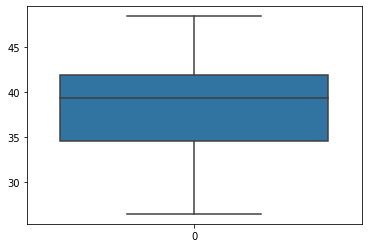

In [33]:
sns.boxplot(data=df['lat'])

#### 4.2 Metodo Percentil

In [31]:
limit_superior = df["lat"].quantile(0.99)
limit_inferior = df["lat"].quantile(0.01)
print("limite_superior", limit_superior)
print("limite_inferior", limit_inferior)

limite_superior 48.4786
limite_inferior 26.4722


##### Eliminar Outliers

In [27]:
new_df = df.loc[(df["lat"] < limit_superior) & (df["lat"] > limit_inferior)]
print("old_data", len(df))
print("new_data", len(new_df))

old_data 1296675
new_data 1266490


##### Limitar Outliers entre Limite Inferior y Limite Superior

In [32]:
df.loc[(df["lat"]>limit_superior), "lat"] = limit_superior
df.loc[(df["lat"]<limit_inferior), "lat"] = limit_inferior

C:\Users\Bryan\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

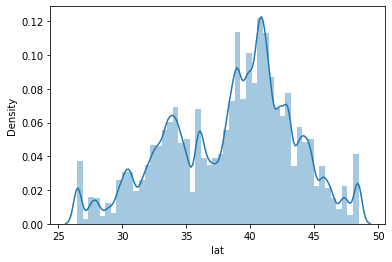

In [34]:
sns.distplot(df["lat"])

### 2.5 Transformacion de Variables Categoricas

#### One-Hot-Encoding

In [12]:
#Utilizamos la funcion get_dummies de Pandas
y = pd.get_dummies(df['category'], prefix='1HotEnc')
y

1HotEnc_entertainment  1HotEnc_food_dining  1HotEnc_gas_transport  \
0                            0                    0                      0   
1                            0                    0                      0   
2                            1                    0                      0   
3                            0                    0                      1   
4                            0                    0                      0   
...                        ...                  ...                    ...   
1296670                      1                    0                      0   
1296671                      0                    1                      0   
1296672                      0                    1                      0   
1296673                      0                    1                      0   
1296674                      0                    1                      0   

         1HotEnc_grocery_net  1HotEnc_grocery_pos  1HotEnc_health_fitness  \
0                          0                    0                       0   
1                          0                    1                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   
...                      ...                  ...                     ...   
1296670                    0                    0                       0   
1296671                    0                    0                       0   
1296672                    0                    0                       0   
1296673                    0                    0                       0   
1296674                    0                    0                       0   

         1HotEnc_home  1HotEnc_kids_pets  1HotEnc_misc_net  1HotEnc_misc_pos  \
0                   0                  0                 1                 0   
1                   0                  0                 0                 0   
2                   0                  0                 0                 0   
3                   0                  0                 0                 0   
4                   0                  0                 0                 1   
...               ...                ...               ...               ...   
1296670             0                  0                 0                 0   
1296671             0                  0                 0                 0   
1296672             0                  0                 0                 0   
1296673             0                  0                 0                 0   
1296674             0                  0                 0                 0   

         1HotEnc_personal_care  1HotEnc_shopping_net  1HotEnc_shopping_pos  \
0                            0                     0                     0   
1                            0                     0                     0   
2                            0                     0                     0   
3                            0                     0                     0   
4                            0                     0                     0   
...                        ...                   ...                   ...   
1296670                      0                     0                     0   
1296671                      0                     0                     0   
1296672                      0                     0                     0   
1296673                      0                     0                     0   
1296674                      0                     0                     0   

         1HotEnc_travel  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1296670               0  
1296671               0  
1296672        

##### Utilizaremos la libreria de One Hot Encoding de Skilaearn

In [5]:
# Utilizaremos la libreria de One Hot Encoding de Skilaearn
#df["gender"].unique()

In [4]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [5]:
ohe.fit_transform(df[["gender","category"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [6]:
feature_array = ohe.fit_transform(df[["gender","category"]]).toarray()

In [7]:
ohe.categories_

[array(['F', 'M'], dtype=object),
 array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
        'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
        'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
        'travel'], dtype=object)]

In [8]:
feature_labels = np.append(ohe.categories_[0],ohe.categories_[1])
feature_labels

array(['F', 'M', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home',
       'kids_pets', 'misc_net', 'misc_pos', 'personal_care',
       'shopping_net', 'shopping_pos', 'travel'], dtype=object)

In [9]:
features = pd.DataFrame(feature_array, columns = feature_labels)

In [10]:
pd.concat([df,features], axis=1)

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  ...  \
0           Jennifer      Banks      F                 561 Perry Cove  ...   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez      M       594 White Dale Suite 530  ...   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia      M               408 Bradley Rest  ...   
...              ...        ...    ...                            ...  ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray      M           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith      M           135 Joseph Mountains  ...   

        grocery_pos health_fitness  home  kids_pets  misc_net  misc_pos  \
0               0.0            0.0   0.0        0.0       1.0       0.0   
1               1.0            0.0   0.0        0.0       0.0       0.0   
2               0.0            0.0   0.0        0.0       0.0       0.0   
3               0.0            0.0   0.0        0.0       0.0       0.0   
4               0.0            0.0   0.0        0.0       0.0       1.0   
...             ...            ...   ...        ...       ...       ...   
1296670         0.0            0.0   0.0        0.0       0.0       0.0   
1296671         0.0            0.0   0.0        0.0       0.0       0.0   
1296672         0.0            0.0   0.0        0.0       0.0       0.0   
1296673         0.0            0.0   0.0        0.0       0.0       0.0   
1296674         0.0            0.0   0.0        0.0       0.0       0.0   

        personal_care shopping_net shopping_pos  travel  
0                 0.0          0.0          0.0     0.0  
1                 0.0          0.0          0.0     0.0  
2                 0.0          0.0          0.0     0.0  
3                 0.0          0.0          0.0     0.0  
4                 0.0          0.0          0.0     0.0  
...               ...          ...          ...     ...  
1296670           0.0          0.0          0.0     0.0  
1296671           0.0          0.0          0.0     0.0  
129

In [11]:
df_now = pd.concat([df,features], axis=1)

##### Codificacion por Etiquetas

In [46]:
gender_ = {"M":1, "F":0}

In [47]:
df["gender"]=df["gender"].map(gender_)
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last  gender                         street  ...  \
0           Jennifer      Banks       0                 561 Perry Cove  ...   
1          Stephanie       Gill       0   43039 Riley Greens Suite 393  ...   
2             Edward    Sanchez       1       594 White Dale Suite 530  ...   
3             Jeremy      White       1    9443 Cynthia Court Apt. 038  ...   
4              Tyler     Garcia       1               408 Bradley Rest  ...   
...              ...        ...     ...                            ...  ...   
1296670         Erik  Patterson       1       162 Jessica Row Apt. 072  ...   
1296671      Jeffrey      White       1  8617 Holmes Terrace Suite 651  ...   
1296672  Christopher  Castaneda       1     1632 Cohen Drive Suite 639  ...   
1296673       Joseph     Murray       1           42933 Ryan Underpass  ...   
1296674      Jeffrey      Smith       1           135 Joseph Mountains  ...   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...              

#### Discretizacion de Variable Continua (Generar data en rangos)

In [40]:
df.lat

0          36.0788
1          48.4786
2          42.1808
3          46.2306
4          38.4207
            ...   
1296670    37.7175
1296671    39.2667
1296672    32.9396
1296673    43.3526
1296674    45.8433
Name: lat, Length: 1296675, dtype: float64

In [41]:
pd.qcut(df.lat, 4, labels=["Bajo", "Medio", "Medio-Alto","Alto"])

0          Medio
1           Alto
2           Alto
3           Alto
4          Medio
           ...  
1296670    Medio
1296671    Medio
1296672     Bajo
1296673     Alto
1296674     Alto
Name: lat, Length: 1296675, dtype: category
Categories (4, object): ['Bajo' < 'Medio' < 'Medio-Alto' < 'Alto']

### 2.6 Escalado,Normalizacion, Estadanrazion de  Datos

In [50]:
df1 = df[["lat","long","merch_long"]]
df1.head()
df1.describe()

lat          long    merch_long
count  1.296675e+06  1.296675e+06  1.296675e+06
mean   3.853762e+01 -9.022634e+01 -9.022646e+01
std    5.075808e+00  1.375908e+01  1.377109e+01
min    2.002710e+01 -1.656723e+02 -1.666712e+02
25%    3.462050e+01 -9.679800e+01 -9.689728e+01
50%    3.935430e+01 -8.747690e+01 -8.743839e+01
75%    4.194040e+01 -8.015800e+01 -8.023680e+01
max    6.669330e+01 -6.795030e+01 -6.695090e+01

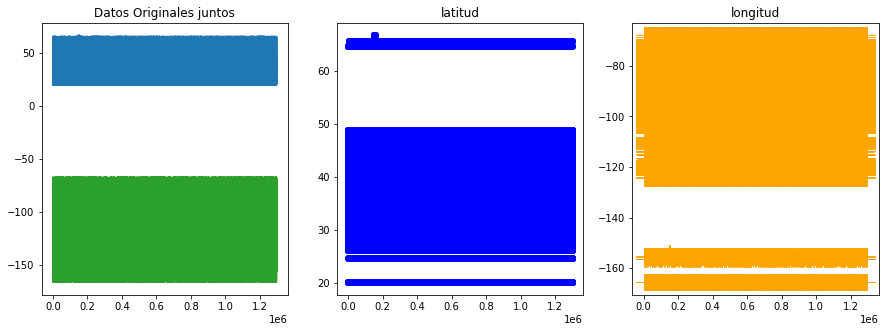

In [51]:
#Graficando los datos en su Escala Original
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.set_title("Datos Originales juntos")
ax1.plot(df1)
ax2.set_title("latitud")
ax2.plot(df1["lat"], linewidth=0, marker="o", color="blue", markersize=6)
ax3.set_title("longitud")
ax3.plot(df1["long"], linewidth=0, marker="+", color="orange", markersize=16)
plt.show()


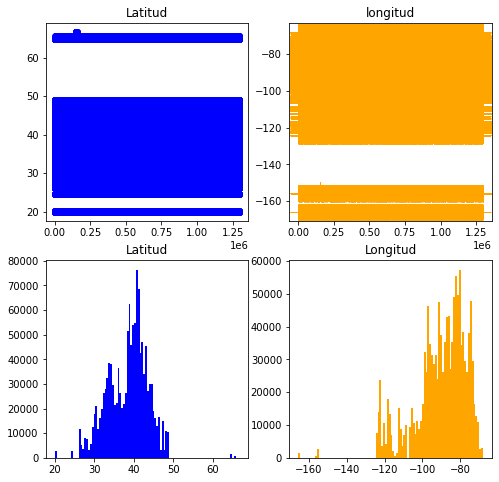

In [52]:
# Distribucion de los datos originales
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title("Latitud")
ax1.plot(df1["lat"], linewidth=0, marker="o", color="blue", markersize=6)
ax2.set_title("longitud")
ax2.plot(df1["long"], linewidth=0, marker="+", color="orange", markersize=16)
ax3.set_title("Latitud")
ax3.hist(df1["lat"], bins=100, color="blue")
ax4.set_title("Longitud")
ax4.hist(df1["long"], bins=100, color="orange")
plt.show()


##### 2.6.1 Escalado  en funcion del minimo y maximo

In [54]:
from sklearn import preprocessing
datos_min_max = preprocessing.MinMaxScaler().fit_transform(df1)
datos_min_max

array([[0.34396844, 0.86463846, 0.84860247],
       [0.61844976, 0.48568183, 0.48620753],
       [0.47472689, 0.54655349, 0.5466965 ],
       ...,
       [0.2766992 , 0.61248644, 0.617133  ],
       [0.49983714, 0.64602853, 0.63607968],
       [0.55320982, 0.53004953, 0.52632324]])

In [53]:
#Importante para reducir el tiempo de convergencia al minimo local
#Usando 
#from sklearn import preprocessing
#columna_amt = df['amt'].values # Devuelve arreglo numpy
#min_max_scaler = preprocessing.MinMaxScaler()
#columna_amt_scaled = min_max_scaler.fit_transform(columna_amt.reshape(-1,1))
#columna_amt_scaled

##### 2.6.2 Normalizacion en funcion de la Norma del Vector

In [58]:
datos_normalizer = preprocessing.Normalizer().fit_transform(df1.T)
datos_normalizer= datos_normalizer.T
#normalizado = X / raiz_cuadrada(x_1^2, ......)
datos_normalizer

array([[ 0.00081511, -0.00078108, -0.00078944],
       [ 0.0011045 , -0.00113741, -0.00113715],
       [ 0.00095297, -0.00108017, -0.00107911],
       ...,
       [ 0.00074419, -0.00101818, -0.00101153],
       [ 0.00097944, -0.00098664, -0.00099335],
       [ 0.00103572, -0.00109569, -0.00109866]])

##### 2.6.3 Estandarizacion de los Datos (desv_std=1, media=0)

In [59]:
datos_standard_scaler = preprocessing.StandardScaler().fit_transform(df1)
# estandarizacion = (X - media) / std

datos_robust_scaler = preprocessing.RobustScaler().fit_transform(df1)
# estandarizacion = (X - RIC) / std

datos_standard_scaler, datos_robust_scaler

(array([[-0.48441989,  0.65761961,  0.59386386],
        [ 2.03911997, -2.03387012, -2.03034087],
        [ 0.7177536 , -1.60153717, -1.59232303],
        ...,
        [-1.10288318, -1.13325703, -1.08227231],
        [ 0.94861347, -0.89502874, -0.94507404],
        [ 1.43931381, -1.71875438, -1.73985164]]),
 array([[-0.44747879,  0.37853365,  0.32352473],
        [ 1.3024085 , -1.84697115, -1.84556939],
        [ 0.38613915, -1.48948918, -1.48351611],
        ...,
        [-0.87633711, -1.10228365, -1.06192247],
        [ 0.54622331, -0.90530048, -0.94851823],
        [ 0.88648752, -1.58641226, -1.60545912]]))

##### Columna "Latitud" : Comparacion de Metodos

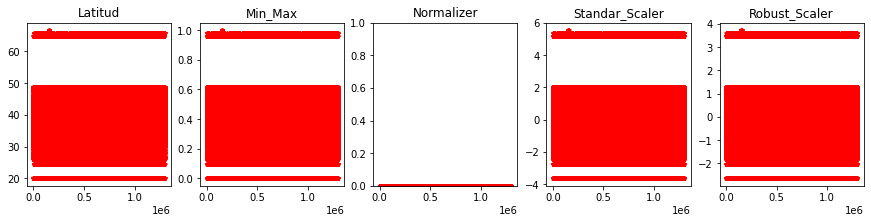

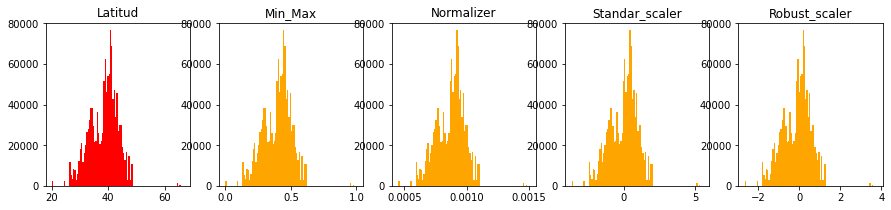

In [66]:
# convierte vectores de numpy a dataframe para graficarlos
datos_max_min = pd.DataFrame(datos_min_max, columns=["latitud","longitud","amt"])
datos_normalizer = pd.DataFrame(datos_normalizer, columns=["latitud","longitud","amt"])
datos_standard_scaler = pd.DataFrame(datos_standard_scaler, columns=["latitud","longitud","amt"])
datos_robust_scaler = pd.DataFrame(datos_robust_scaler, columns=["latitud","longitud","amt"])

#crea una figura con 5 subfiguras para comparar los metodos
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

#crear y personalizar series de datos
ax1.set_title("Latitud")
ax1.plot(df1["lat"], linewidth=0, marker="*", color="red", markersize=4)

ax2.set_title("Min_Max")
ax2.plot(datos_max_min["latitud"], linewidth=0, marker="*", color="red", markersize=4)

ax3.set_title("Normalizer")
ax3.plot(datos_normalizer["latitud"],linewidth=0, marker="*", color="red", markersize=4)
ax3.set_ylim(0,1)

ax4.set_title("Standar_Scaler")
ax4.plot(datos_standard_scaler["latitud"],linewidth=0, marker="*", color="red", markersize=4)

ax5.set_title("Robust_Scaler")
ax5.plot(datos_robust_scaler["latitud"],linewidth=0, marker="*", color="red", markersize=4)

plt.show()

#crea una figura con 5 subfiguras para los histogramas
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

#crea y personaliza serie de datos de los histogramas
ax1.set_title("Latitud")
ax1.hist(df1["lat"], bins=100, color="red")

ax2.set_title("Min_Max")
ax2.hist(datos_max_min["latitud"], bins=100, color="orange")

ax3.set_title("Normalizer")
ax3.hist(datos_normalizer["latitud"], bins=100, color="orange")

ax4.set_title("Standar_scaler")
ax4.hist(datos_standard_scaler["latitud"], bins=100, color="orange")

ax5.set_title("Robust_scaler")
ax5.hist(datos_robust_scaler["latitud"], bins=100, color="orange")

plt.show()


### 2.7 Balanceo de Datos

In [14]:
data = df.drop(['is_fraud'], axis=1)
data2 = df_now.loc[:,['F','M','amt','long','lat','city_pop']]
# 0: No Fraude,  1: Fraude
target = df.loc[:, ['is_fraud']]
fraude = target.sum()
no_fraude = target.shape[0]-fraude
print("fraude",fraude, "no_fraude", no_fraude)

fraude is_fraud    7506
dtype: int64 no_fraude is_fraud    1289169
dtype: int64


In [9]:
target.head(5)

is_fraud
0         0
1         0
2         0
3         0
4         0

##### 2.7.1 SobreMuestreo

In [18]:
#Importamos librerias
from imblearn.over_sampling import RandomOverSampler , SMOTE
#Iniziliacion del metodo de Sobremuestreo
#ROS (Duplica muestras de lo que ya se tiene en el dataset)
ros = RandomOverSampler()
#SMOTE(Crea muestras plasticas, apartir de las existentes en el dataset(utilizando la media ponderada))
smote = SMOTE()

In [20]:
# ROS, Duplica muestras de la clase menos representada
dataRos, targetRos = ros.fit_resample(data, target)
fraude_Ros = targetRos.sum()
no_fraude_Ros = targetRos.shape[0]-fraude_Ros
print("fraude",fraude_Ros, "no_fraude", no_fraude_Ros)
dataRos

fraude is_fraud    1289169
dtype: int64 no_fraude is_fraud    1289169
dtype: int64


Unnamed: 0 trans_date_trans_time            cc_num  \
0                 0   2019-01-01 00:00:18  2703186189652095   
1                 1   2019-01-01 00:00:44      630423337322   
2                 2   2019-01-01 00:00:51    38859492057661   
3                 3   2019-01-01 00:01:16  3534093764340240   
4                 4   2019-01-01 00:03:06   375534208663984   
...             ...                   ...               ...   
2578333       74072   2019-02-12 22:20:10  3520550088202337   
2578334      477232   2019-07-28 16:32:46  2719496466799416   
2578335      681432   2019-10-17 23:16:59   180065479077096   
2578336     1051741   2020-03-12 07:29:32  4501449508569485   
2578337      392560   2019-06-28 23:23:13  3519232971341141   

                                   merchant       category      amt  \
0                fraud_Rippin, Kub and Mann       misc_net     4.97   
1           fraud_Heller, Gutmann and Zieme    grocery_pos   107.23   
2                      fraud_Lind-Buckridge  entertainment   220.11   
3        fraud_Kutch, Hermiston and Farrell  gas_transport    45.00   
4                       fraud_Keeling-Crist       misc_pos    41.96   
...                                     ...            ...      ...   
2578333              fraud_Volkman-Predovic   shopping_net  1089.43   
2578334              fraud_Volkman-Predovic   shopping_net  1031.52   
2578335                fraud_Boyer-Reichert   shopping_net   988.32   
2578336     fraud_Heller, Gutmann and Zieme    grocery_pos   309.03   
2578337   fraud_Kerluke, Kertzmann and Wiza       misc_net   694.01   

             first     last gender                        street  ...    zip  \
0         Jennifer    Banks      F                561 Perry Cove  ...  28654   
1        Stephanie     Gill      F  43039 Riley Greens Suite 393  ...  99160   
2           Edward  Sanchez      M      594 White Dale Suite 530  ...  83252   
3           Jeremy    White      M   9443 Cynthia Court Apt. 038  ...  59632   
4            Tyler   Garcia      M              408 Bradley Rest  ...  24433   
...            ...      ...    ...                           ...  ...    ...   
2578333    Micheal  Walters      M   15315 Vaughn Park Suite 356  ...  55606   
2578334     Sheila    Baker      F           8030 Walker Heights  ...  57717   
2578335    Krystal   Gamble      F            47152 Clayton Burg  ...  21102   
2578336       Paul     Wade      M    2306 Clark Ranch Suite 515  ...  57439   
2578337    Michael    Jones      M                754 Smith Isle  ...  43903   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
2578333  47.8342  -90.0476       272                  Freight forwarder   
2578334  44.6723 -103.8396      8007                Hospital pharmacist   
2578335  39.6747  -76.8941     11751        Clinical research associate   
2578336  45.3290  -98.0837        52                         Bookseller   
2578337  40.4731  -80.9596      2208                Mental health nurse   

                dob                         trans_num   unix_time  merch_lat  \
0        1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1        1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2        1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3        1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
4        1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   
...             ...                               ...    

In [26]:
# SMOTE: Genera nuevas muestras sinteticas
dataSmote, targetSmote = smote.fit_resample(data2, target)
fraude_Smote = targetSmote.sum()
no_fraude_Smote = targetSmote.shape[0]-fraude_Smote
print("fraude",fraude_Smote, "no_fraude", no_fraude_Smote)
dataSmote

fraude is_fraud    1289169
dtype: int64 no_fraude is_fraud    1289169
dtype: int64


cc_num          amt    zip      lat      long  city_pop
0        2703186189652095     4.970000  28654  36.0788  -81.1781      3495
1            630423337322   107.230000  99160  48.8878 -118.2105       149
2          38859492057661   220.110000  83252  42.1808 -112.2620      4154
3        3534093764340240    45.000000  59632  46.2306 -112.1138      1939
4         375534208663984    41.960000  24433  38.4207  -79.4629        99
...                   ...          ...    ...      ...       ...       ...
2578333   370877495212014   205.245214  28659  36.2017  -81.1286     21134
2578334  6569097840281287   324.077774  80014  39.6662 -104.8350    389246
2578335  6011626928491360   317.933618  38315  35.2289  -88.6440      3876
2578336  4025612008285111  1054.427841  15829  41.1762  -79.1976      1274
2578337  2229824890647120   132.641256  39572  30.2508  -89.6011      1414

[2578338 rows x 6 columns]

In [29]:
#targetSmote.sum()

#### 2.7.2 Submuestreo

In [31]:
#Importamos librerias
from imblearn.under_sampling import RandomUnderSampler , NearMiss
#Iniziliacion del metodo de Submuestreo
#RUS 
rus = RandomUnderSampler() #random_state = 0
#NearMiss
nm = NearMiss()

In [32]:
#RUS.Elimina muestras de la clase mas representada aleatoriamente
dataRus, targetRus = rus.fit_resample(data, target)
fraude_Rus = targetRus.sum()
no_fraude_Rus = targetRus.shape[0]-fraude_Rus
print("fraude",fraude_Rus, "no_fraude", no_fraude_Rus)
dataRus

fraude is_fraud    7506
dtype: int64 no_fraude is_fraud    7506
dtype: int64


Unnamed: 0 trans_date_trans_time            cc_num  \
0          683181   2019-10-18 22:11:26   345389171551808   
1          630870   2019-09-25 11:53:16   213120463918358   
2          318223   2019-06-02 07:35:20  3529597810116815   
3          116666   2019-03-07 06:01:47   213174467670432   
4          688652   2019-10-20 20:20:16   180094608895855   
...           ...                   ...               ...   
15007     1295399   2020-06-21 01:00:08  3524574586339330   
15008     1295491   2020-06-21 01:53:35  3524574586339330   
15009     1295532   2020-06-21 02:16:56  4005676619255478   
15010     1295666   2020-06-21 03:26:20  3560725013359375   
15011     1295733   2020-06-21 03:59:46  4005676619255478   

                                   merchant       category      amt    first  \
0                        fraud_Kling-Ernser  entertainment    29.88   Justin   
1       fraud_Robel, Cummerata and Prosacco  gas_transport    46.11   Willie   
2      fraud_Tillman, Dickinson and Labadie  gas_transport    67.07   Pamela   
3             fraud_Reilly, Heaney and Cole  gas_transport    47.29    James   
4                          fraud_Runte-Mohr    food_dining    31.01   Tammie   
...                                     ...            ...      ...      ...   
15007                    fraud_Kassulke PLC   shopping_net   977.01   Ashley   
15008                      fraud_Schumm PLC   shopping_net  1210.91   Ashley   
15009  fraud_Tillman, Dickinson and Labadie  gas_transport    10.24  William   
15010                  fraud_Corwin-Collins  gas_transport    21.69   Brooke   
15011                   fraud_Koss and Sons  gas_transport    10.20  William   

          last gender                           street  ...    zip      lat  \
0       Fowler      M      5569 Phillips Neck Apt. 003  ...  38922  33.9215   
1       Jordan      M                     529 West Key  ...  71277  32.9550   
2       Curtis      F    8969 Fuentes Station Apt. 291  ...  17060  40.4679   
3       Bishop      M  7055 Fernandez Estates Apt. 676  ...  21913  39.4015   
4       Harper      F           57887 Gutierrez Harbor  ...  97492  43.7575   
...        ...    ...                              ...  ...    ...      ...   
15007  Cabrera      F     94225 Smith Springs Apt. 617  ...  32960  27.6330   
15008  Cabrera      F     94225 Smith Springs Apt. 617  ...  32960  27.6330   
15009    Perry      M     458 Phillips Island Apt. 768  ...  70726  30.4590   
15010    Smith      F        63542 Luna Brook Apt. 012  ...  79759  31.8599   
15011    Perry      M     458 Phillips Island Apt. 768  ...  70726  30.4590   

           long  city_pop                     job         dob  \
0      -89.6782      3451        Financial trader  1984-05-19   
1      -92.5870      1758  Psychologist, forensic  1957-08-08   
2      -77.8967      1334           Archaeologist  1986-12-17   
3      -75.8654       663              Podiatrist  1969-01-14   
4     -122.4810       597   Forensic psychologist  1961-05-19   
...         ...       ...                     ...         ...   
15007  -80.4031    105638       Librarian, public  1986-05-07   
15008  -80.4031    105638       Librarian, public  1986-05-07   
15009  -90.9027     71335               Herbalist  1994-05-31   
15010 -102.7413        23          Cytogeneticist  1969-09-15   
15011  -90.9027     71335               Herbalist  1994-05-31   

                              trans_num   unix_time  merch_lat  merch_long  
0      5b08f3860764e851a4b8237d5d3927f3  1350598286  34.229943  -90.172869  
1      cc380dae44fb8bbf089fc530a051deab  1348573996  33.569570  -92.437117  
2      a48f03c19b8c18f7d7446840bfe047c9  1338622520  40.375213  -78.020942  
3      ddafd9a9e507981c838d7276a46094f7  1331100107  38.988239  -74.872798  
4      b120c66d7207f9c5bf7bf41381de2eac  1350764416  44.703132 -123.459171  
...                                 ...         ...        ...         ...  
15007  a83b093f0c1d9068fa0089f7c722615f  137

In [34]:
# NearMiss(Uniones cercanas). Elimina las muestras mas cercanas de la clase mas representada
dataNm, targetNm = nm.fit_resample(data2, target)
fraude_Nm = targetNm.sum()
no_fraude_Nm = targetNm.shape[0]-fraude_Nm
print("fraude",fraude_Nm, "no_fraude", no_fraude_Nm)
dataNm

fraude is_fraud    7506
dtype: int64 no_fraude is_fraud    7506
dtype: int64


cc_num      amt    zip      lat      long  city_pop
0      3549202406645667     8.78   4074  43.5835  -70.3457     18760
1      3549202406645667     8.76   4074  43.5835  -70.3457     18760
2         4186530744674     9.37  29817  33.3645  -81.2718      4913
3      3549202406645667     8.73   4074  43.5835  -70.3457     18760
4         4186530744674     9.30  29817  33.3645  -81.2718      4913
...                 ...      ...    ...      ...       ...       ...
15007  3524574586339330   977.01  32960  27.6330  -80.4031    105638
15008  3524574586339330  1210.91  32960  27.6330  -80.4031    105638
15009  4005676619255478    10.24  70726  30.4590  -90.9027     71335
15010  3560725013359375    21.69  79759  31.8599 -102.7413        23
15011  4005676619255478    10.20  70726  30.4590  -90.9027     71335

[15012 rows x 6 columns]

##### 2.7.3 Sobremuestreo + Submuestreo

In [13]:
#Importamos librerias
from imblearn.combine import SMOTETomek
#Iniziliacion del metodo de Combinado
#SMOTE Tomek
smoteT = SMOTETomek() #random_state = 0

In [15]:
# Smote-Tomek. Sobremuestreo con SMOTE y seguido de un Submuestreo con Uniones Tomek parecido a (NearMiss)
datasmoteT, targetsmoteT = smoteT.fit_resample(data2, target)
fraude_smoteT = targetsmoteT.sum()
no_fraude_smoteT = targetsmoteT.shape[0]-fraude_smoteT
print("fraude",fraude_smoteT, "no_fraude", no_fraude_smoteT)
datasmoteT

fraude is_fraud    1255104
dtype: int64 no_fraude is_fraud    1255104
dtype: int64


F         M         amt        long        lat  city_pop
0        1.000000  0.000000    4.970000  -81.178100  36.078800      3495
1        1.000000  0.000000  107.230000 -118.210500  48.887800       149
2        0.000000  1.000000  220.110000 -112.262000  42.180800      4154
3        0.000000  1.000000   45.000000 -112.113800  46.230600      1939
4        0.000000  1.000000   41.960000  -79.462900  38.420700        99
...           ...       ...         ...         ...        ...       ...
2510203  0.412802  0.587198  375.479117 -107.943194  42.905718       743
2510204  0.000000  1.000000  909.691674  -73.795289  41.295182     19856
2510205  0.000000  1.000000  760.116968  -79.878183  41.561485      1456
2510206  0.140556  0.859444  946.175017  -73.145496  43.250641       970
2510207  0.000000  1.000000  297.426218  -91.818134  31.466319     55521

[2510208 rows x 6 columns]

In [25]:
df_final = pd.concat([datasmoteT,targetsmoteT], axis=1)

### 2.8 Seleccion de Variables

##### 2.8.1 Metodo de Correlacion

<AxesSubplot:>

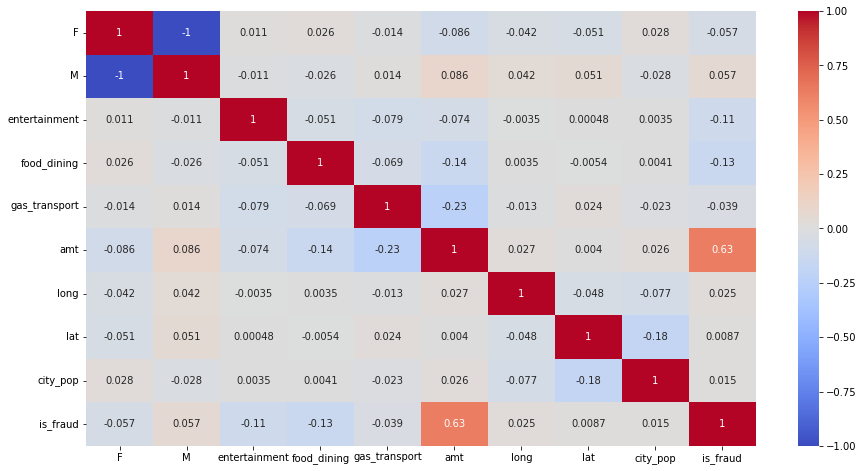

In [26]:
# Elegir Corr. Alta entre variable Dependiente y Independiente
# Elegir Corr. Baja entre variables independientes
plt.figure(figsize = (15,8))
sns.heatmap(df_final.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

##### 2.8.2 Metodo de Informacion Mutua 

In [27]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(
    #matriz caracteristicas
    X=datasmoteT,
    # target vector
    y=targetsmoteT,
    #Numero Kvecinos cercanos
    n_neighbors=3,
    #If es boleano, considera todas las caracteristicas disccretas o continuas
    discrete_features="auto",
    #Determinar un numero random, para añadir bajo ruido de las variables, y remover duplicados
    random_state=None,
)
mutual_info

C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.1764136 , 0.16435897, 0.02117746, 0.01898647, 0.04404535,
       0.59180388, 0.39258858, 0.3925553 , 0.27935557])

### 3. Preparamos Datos en Train y Test

In [16]:
X = datasmoteT
X = datasmoteT.loc[:,["F","M","amt","long","lat","city_pop"]]
#X = df.loc[:, ['ID_CLIENT','SEX','AGE', 'AREA_CODE_RESIDENCIAL_PHONE','PAYMENT_DAY']]
X.head()

F    M     amt      long      lat  city_pop
0  1.0  0.0    4.97  -81.1781  36.0788      3495
1  1.0  0.0  107.23 -118.2105  48.8878       149
2  0.0  1.0  220.11 -112.2620  42.1808      4154
3  0.0  1.0   45.00 -112.1138  46.2306      1939
4  0.0  1.0   41.96  -79.4629  38.4207        99

In [30]:
#X = pd.concat([X, pd.get_dummies(X['SEX'],prefix='1HotEnc')], axis=1)
#X = X.drop(['SEX'], axis=1)
#X

In [41]:
#var_s = {'F':0, 'M':1}
#X['SEX'] = X['SEX'].map(var_s)
#X.head()

In [17]:
Y = targetsmoteT
#Y = df.loc[:, ['TARGET_LABEL_BAD=1']]
Y.head()

is_fraud
0         0
1         0
2         0
3         0
4         0

In [18]:
X = np.asarray(X)
Y = np.asarray(Y)

X.shape, Y.shape

((2510208, 6), (2510208, 1))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((2008166, 6), (2008166, 1), (502042, 6), (502042, 1))

### 4. Implementacion de Modelos Machine Learning y Deep Learning

#### 4.1 Modelo MLP(Multilayer Perceptron) - KERAS 

In [37]:
model_MLP = Sequential()
model_MLP.add(Dense(10, input_dim=6, activation='relu'))  # input_shape=(None,5)
model_MLP.add(Dense(1,activation='sigmoid'))

#### MLP Hyperparameters

In [39]:
model_MLP.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [42]:
#entrenar modelo
historico=model_MLP.fit(X_train,y_train,epochs=30, verbose=1,batch_size=2000)

Epoch 1/30
1017/1017 [==============================] - 9s 8ms/step - loss: 23.4880 - accuracy: 0.7899
Epoch 2/30
1017/1017 [==============================] - 7s 7ms/step - loss: 21.7329 - accuracy: 0.7905
Epoch 3/30
1017/1017 [==============================] - 7s 7ms/step - loss: 22.2804 - accuracy: 0.7907
Epoch 4/30
1017/1017 [==============================] - 7s 7ms/step - loss: 21.8583 - accuracy: 0.7907
Epoch 5/30
1017/1017 [==============================] - 8s 7ms/step - loss: 21.0265 - accuracy: 0.7901
Epoch 6/30
1017/1017 [==============================] - 8s 7ms/step - loss: 22.8571 - accuracy: 0.7888
Epoch 7/30
1017/1017 [==============================] - 8s 7ms/step - loss: 22.6817 - accuracy: 0.7907
Epoch 8/30
1017/1017 [==============================] - 8s 8ms/step - loss: 22.6119 - accuracy: 0.7894
Epoch 9/30
1017/1017 [==============================] - 7s 7ms/step - loss: 22.4480 - accuracy: 0.7913
Epoch 10/30
1017/1017 [==============================] - 7s 7ms/step - lo

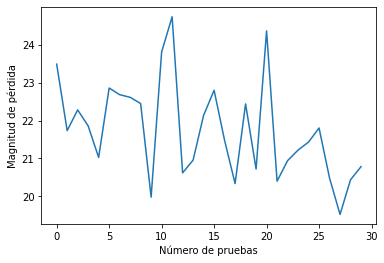

In [45]:
#Graficamos la funcion de error en cada epoca de train
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

In [44]:
loss, accuracy = model_MLP.evaluate(X_test,y_test,verbose=1)

15883/15883 [==============================] - 94s 6ms/step - loss: 24.9138 - accuracy: 0.6810


In [46]:
model_MLP.save('model_MLP.h5')

#### Modelo Red Neuronal - TensorFlow

In [28]:
# creamos una capa densa para conectar los datos de entrada con los de salida
#units: n°salidas, input_shape:entradas
capa = tf.keras.layers.Dense(units = 1, input_shape=[6])

# Creamos un modelo sequencial para este caso
# Utilizamos una función de pérdida de error cuadrático medio
# Usamos el optimizador de Adamax para que el modelo mejore en lugar de empeorar conforme se entrena
modelo_tf = tf.keras.Sequential([capa])
modelo_tf.compile(
  optimizer=tf.keras.optimizers.Adam(0.1), # (learning_rate:amenor, demorara en converger, y si mayor podria converger muy rapido fallando)
  loss="mean_squared_error"
)

In [29]:
# Entrenamos el modelo. Le decimos a la función fit que lo haga 100 veces con epoch. 
# ¿Esto es mucho o poco? Lo averiguaremos cuando grafiquemos la función de pérdida.
modelo_tf.fit(X_train,y_train, epochs=2, verbose=False)

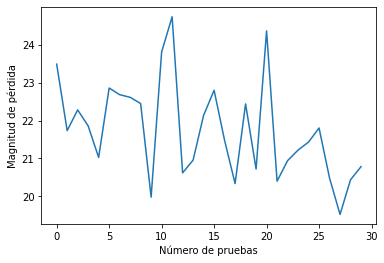

In [45]:
#Graficamos la funcion de error en cada epoca de train
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico2.history["loss"])
plt.show()

In [30]:
loss, accuracy = modelo_tf.evaluate(X_test,y_test,verbose=1)

15689/15689 [==============================] - 99s 6ms/step - loss: 21.6313


TypeError: cannot unpack non-iterable float object

In [31]:
modelo_tf.save('model_red_TensorFlow.h5')

#### Modelo Decision Tree - Sklearn 

In [21]:
#Creamos el modelo
tree = DecisionTreeClassifier()

In [22]:
#entrenamos el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
#Hacemos prediccion de datos test
preds = tree.predict(X_test)

In [24]:
#Matriz de confusion
print(classification_report(y_test,preds))

C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99    502042

    accuracy                           0.98    502042
   macro avg       0.50      0.49      0.49    502042
weighted avg       1.00      0.98      0.99    502042



C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import pickle
 
#filename es el nombre que le daremos a nuestro archivo
filename = 'model_tree_sklearn.pkl'
#Con el comando dump y la instrucción wb nos aseguramos de crear y escribir sobre el 
#archivo creado, otra precaución es lo que deseamos guardar en este caso fue el modelo
pickle.dump(tree, open(filename,'wb'))

## Matriz de Confusion 

In [22]:
predictions = model.predict(X_test)
predictions = predictions.round().astype(int)
print(classification_report(y_test,predictions))


250/250 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      6432
           1       0.00      0.00      0.00      1568

    accuracy                           0.80      8000
   macro avg       0.40      0.50      0.45      8000
weighted avg       0.65      0.80      0.72      8000



C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Bryan\Miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Prediccion de Datos nuevos

In [27]:
x_p=np.asarray([19,9,8,0,1,0]).reshape(1,-1)
prediccion=model.predict(x_p)
prediccion

1/1 [==============================] - 0s 78ms/step


array([[0.29135782]], dtype=float32)

In [28]:
prediccion_final=prediccion.round().astype(int)
prediccion_final

array([[0]])